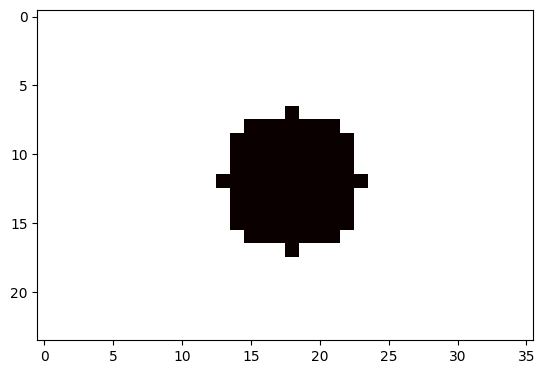

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
import copy
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation
import random

# np.seterr(divide=None, invalid=None)  # For suppressing warnings. Totally optional.

yResolution = 24
xResolution = 36
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()
walls.cylindricalWall([12, 18], 5)
velocityInlet = [] # [VelocityBoundary(12, 2, 1, 1)]
pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

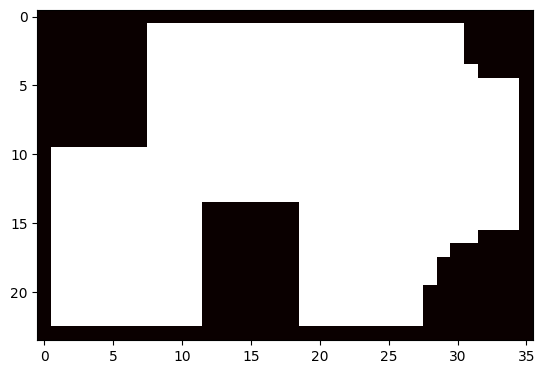

In [11]:
yResolution = 24
xResolution = 36
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()

for i in random.sample(range(8), k = random.randint(1,8)):
    
    possiblePositions = [(int(yResolution/3), xResolution - 1), (0, int(xResolution/3)), (int(yResolution/3), 0), (yResolution - 1, int(xResolution/3)), (0, xResolution - 1), (0, 0), (yResolution - 1, 0), (yResolution - 1, xResolution - 1)]

    wallPos = possiblePositions[i]
    maxSize = int(min(yResolution, xResolution) * 0.4)
    minSize = int(min(yResolution, xResolution) * 0.2)
    if random.random() < 0.5:
        walls.cylindricalWall(wallPos, random.randint(minSize, maxSize))
    else:
        directions = [(1,-1),(1,1),(1,1),(-1,1),(1,-1),(1,1),(-1,1),(-1,-1)]
        endPos = (wallPos[0] + (random.randint(minSize, maxSize)*directions[i][0]), wallPos[1] + (random.randint(minSize, maxSize)*directions[i][1]))
        walls.filledStraightRectangularWall(wallPos, endPos)
    #print(f"{i} {wallPos} {endPos} {directions[i]}")

walls.borderWall()

velocityInlet = [VelocityBoundary(12, 2, 1, 1)]
#pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

{'SizeX': 32, 'SizeY': 48, 'NumberOfCuts': 2, 'TypesOfCuts': [0, 1], 'CutPositionsX': [31, 31], 'CutPositionsY': [47, 16], 'CutSizesX': [12, 10], 'CutSizesY': [12, 6]}
[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (46, 2), (46, 3), (46, 4), (46, 5), (46, 6), (46, 7), (46, 8), (46, 9), (46, 10), (46, 11), (46, 12), (46, 13), (46, 14), (46, 15), (46, 16), (46, 17), (46, 18), (46, 19), (45, 19), (44, 19), (43, 19), (42, 20), (41, 20), (40, 21), (39, 22), (38, 23), (37, 24), (36, 25), (36, 26), (35, 27), (35, 28), (35, 29), (35, 30), (34, 30), (33, 30), (32, 30), (31, 30), (30, 30), (29, 30), (28, 30), (27, 30), (26, 30), (25, 30), (24, 30), (2

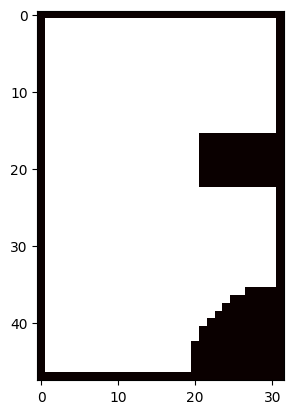

In [12]:
yResolution = 48
xResolution = 32
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()
walls.borderWall()
conditions = walls.generateRoom()
walls.generateIndex()
walls.generateACDirections()
walls.indexPossibleACPos()
print(conditions)
print(walls.possibleACIndex)
#velocityInlet = [VelocityBoundary(12, 2, 1, 1)]
#pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

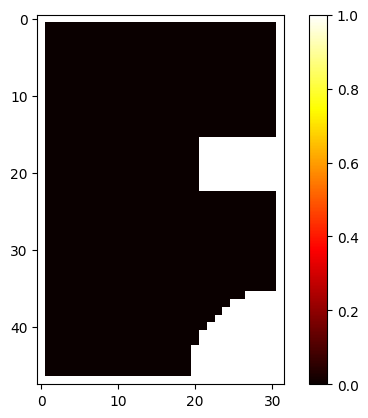

In [13]:
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.boundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)

In [14]:
walls.generateACPosandDirections()

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (1, 0), (1, 31), (2, 0), (2, 31), (3, 0), (3, 31), (4, 0), (4, 31), (5, 0), (5, 31), (6, 0), (6, 31), (7, 0), (7, 31), (8, 0), (8, 31), (9, 0), (9, 31), (10, 0), (10, 31), (11, 0), (11, 31), (12, 0), (12, 31), (13, 0), (13, 31), (14, 0), (14, 31), (15, 0), (15, 31), (16, 0), (16, 21), (16, 22), (16, 23), (16, 24), (16, 25), (16, 26), (16, 27), (16, 28), (16, 29), (16, 30), (17, 0), (17, 21), (18, 0), (18, 21), (19, 0), (19, 21), (20, 0), (20, 21), (21, 0), (21, 21), (22, 0), (22, 21), (22, 22), (22, 23), (22, 24), (22, 25), (22, 26), (22, 27), (22, 28), (22, 29), (22, 30), (23, 0), (23, 31), (24, 0), (24, 31), (25, 0), (25, 31), (26, 0), (26, 31), (27, 0), (27, 31), (28, 0), (28, 31), (29, 0), (29, 31), (30, 0), (30, 31), (31, 0

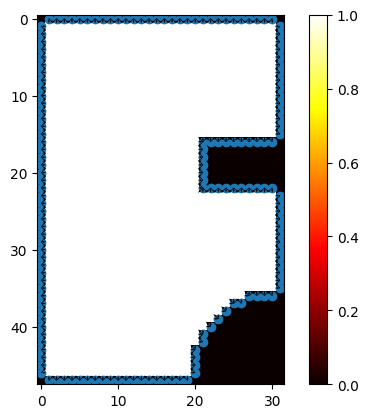

In [15]:
#walls.possibleACPos
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)
ax.scatter([i[1] for i in walls.possibleACPos], [i[0] for i in walls.possibleACPos])
print(walls.possibleACPos)
print(walls.possibleACDirections)

outPutDirectionsY = np.array([WallBoundary.unitVect[j][0] for i in walls.possibleACDirections for j in i])
outPutDirectionsX = np.array([WallBoundary.unitVect[j][1] for i in walls.possibleACDirections for j in i])
outPutPositionsX = [i[0] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
print(len(outPutPositionsX))
outPutPositionsY = [i[1] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
quivermap = ax.quiver(outPutPositionsY, outPutPositionsX, 310*outPutDirectionsX, -310*outPutDirectionsY)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (1, 0), (1, 31), (2, 0), (2, 31), (3, 0), (3, 31), (4, 0), (4, 31), (5, 0), (5, 31), (6, 0), (6, 31), (7, 0), (7, 31), (8, 0), (8, 31), (9, 0), (9, 31), (10, 0), (10, 31), (11, 0), (11, 31), (12, 0), (12, 31), (13, 0), (13, 31), (14, 0), (14, 31), (15, 0), (15, 31), (16, 0), (16, 21), (16, 22), (16, 23), (16, 24), (16, 25), (16, 26), (16, 27), (16, 28), (16, 29), (16, 30), (17, 0), (17, 21), (18, 0), (18, 21), (19, 0), (19, 21), (20, 0), (20, 21), (21, 0), (21, 21), (22, 0), (22, 21), (22, 22), (22, 23), (22, 24), (22, 25), (22, 26), (22, 27), (22, 28), (22, 29), (22, 30), (23, 0), (23, 31), (24, 0), (24, 31), (25, 0), (25, 31), (26, 0), (26, 31), (27, 0), (27, 31), (28, 0), (28, 31), (29, 0), (29, 31), (30, 0), (30, 31), (31, 0

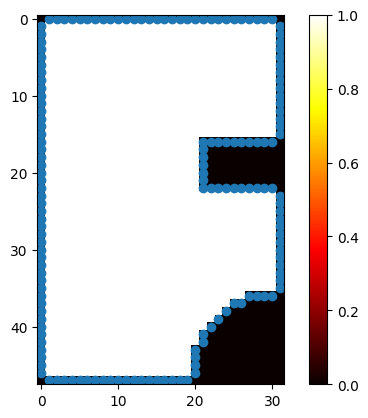

In [16]:
walls.boundaryIndex
walls.boundary
from scipy.ndimage import convolve
def numerical_inverse(n):
    return int(n != 1)

applyall = np.vectorize(numerical_inverse)
inverted = applyall(walls.boundary.astype(int))
#print(inverted)
#plt.imshow(inverted, cmap="hot", interpolation="nearest")
padded_array = np.pad(inverted, pad_width=1, mode='constant', constant_values=0)
kernel = [[1,1,1],[1,0,1],[1,1,1]]
edgeMinesweeper = convolve(padded_array, kernel)[1:-1, 1:-1] 
edgesProcessed = np.logical_and(edgeMinesweeper >= 2, edgeMinesweeper <= 5)

edges = []
edgesX = []
edgesY = []
for i in walls.boundaryIndex:
    if (edgesProcessed[i[0], i[1]]):
        edges.append((i[0], i[1]))
        edgesX.append(i[0])
        edgesY.append(i[1])

print(edges)
fig, ax = plt.subplots()
heatmap  = ax.imshow(inverted, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)
ax.scatter(edgesY, edgesX)

In [17]:
from scipy.ndimage import convolve

def numerical_inverse(n):
    return int(n != 1)

data = np.array([[1,1,1,1],[1,0,0,1],[1,0,0,1],[1,1,1,1]])

applyall = np.vectorize(numerical_inverse)
inverted = applyall(data)
print(inverted)

padded_array = np.pad(inverted, pad_width=1, mode='constant', constant_values=0)
kernel = [[1,1,1],[1,0,1],[1,1,1]]



print(convolve(padded_array, kernel)[1:-1, 1:-1])

[[0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]]
[[1 2 2 1]
 [2 3 3 2]
 [2 3 3 2]
 [1 2 2 1]]


False


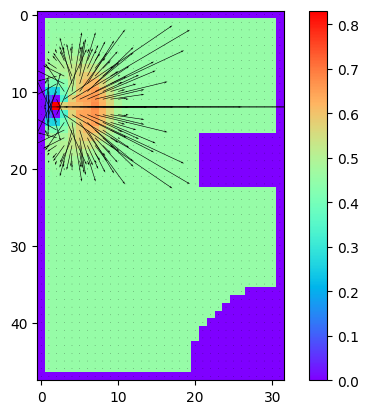

In [18]:
simulation.simulate(step = 10)
print(simulation.isAtDensityEquilibirum(1.9))

densityPlot = copy.copy(simulation.density)
densityPlot[walls.invertedBoundary] -= np.min(densityPlot[walls.invertedBoundary])

fig, ax = plt.subplots()
heatmap = ax.imshow(densityPlot, cmap = "rainbow", interpolation = "nearest")
quivermap = ax.quiver(simulation.xIndex, simulation.yIndex, simulation.momentumX, -simulation.momentumY)
fig.colorbar(heatmap)
# print(simulation.fluid)
plt.show()